In [52]:
import torch
import warnings

warnings.filterwarnings("ignore")

import torch.nn as nn
import pandas as pd

In [88]:
import pandas as pd
import numpy as np

from tqdm import tqdm
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

import matplotlib.pyplot as plt  # To visualize
import json
from collections import Counter, defaultdict
from itertools import chain
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings('ignore')

from itertools import chain
import scipy.stats

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [53]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [54]:
import panphon
ft = panphon.FeatureTable()

In [55]:
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader


In [61]:
class IPARegression(nn.ModuleList):

    def __init__(self, feature_size=24, hidden_dim=50, lstm_layers=1):
        super(IPARegression, self).__init__()

        self.hidden_dim = hidden_dim
        self.feature_size = feature_size  # 24

        self.dropout = nn.Dropout(0.5)

        self.fc1 = nn.Linear(in_features=self.feature_size, out_features=hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)

    def forward(self, x):

        out = self.dropout(x)
        out = torch.relu_(self.fc1(out[:, -1, :]))
        out = self.dropout(out)
        out = self.fc2(out)

        return out


In [62]:
model = IPARegression()

In [68]:
model.load_state_dict(torch.load("../output/Aff.all.Mean/model_6.pt"))

<All keys matched successfully>

In [69]:
model

IPARegression(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=24, out_features=50, bias=True)
  (2): Linear(in_features=50, out_features=1, bias=True)
)

In [70]:
model.eval()

IPARegression(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=24, out_features=50, bias=True)
  (2): Linear(in_features=50, out_features=1, bias=True)
)

In [9]:
df = pd.read_csv("../data/aff+conc/phone_aff_conc_classes.csv")

In [82]:
df

,Unnamed: 0.1,Unnamed: 0,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,...,Conc.CLASS,V.CLASS,A.CLASS,D.CLASS,Conc,V,A,D,Aff,Aff.all
0,0,0,a,eng,ə,alpha~settling,2.035,1.230,5.500,2.240,...,0.0,1.0,0.0,2.0,1.0,4.0,2.0,5.0,3.0,-1.0
1,1,1,a,hun,ɒː,amplitude~elevator,3.855,0.985,5.950,1.500,...,1.0,1.0,0.0,1.0,2.0,4.0,2.0,3.0,2.0,-1.0
2,2,2,a,hun,ɒː,amplitude~legislature,2.730,1.360,3.550,1.570,...,0.0,0.0,0.0,1.0,1.0,2.0,2.0,3.0,1.0,-1.0
3,3,3,a,hun,ɒː,amplitude~menopause,3.055,1.405,1.890,1.020,...,1.0,0.0,0.0,1.0,2.0,0.0,2.0,3.0,1.0,-1.0
4,4,4,a,hun,ɒː,amplitude~movie,3.755,1.185,7.240,1.510,...,1.0,2.0,1.0,1.0,2.0,6.0,3.0,4.0,3.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339687,339687,339687,𐌿𐍂𐍂𐌿𐌽𐍃,got,u r r u n s,dawn~departure,3.765,1.170,5.395,1.750,...,1.0,1.0,0.0,1.0,2.0,4.0,2.0,4.0,2.0,-1.0
339688,339688,339688,𐍃𐌺𐌴𐌹𐌼𐌰,got,s k iː m a,lantern~torch,4.880,0.320,4.935,1.700,...,2.0,1.0,1.0,1.0,3.0,3.0,3.0,4.0,2.0,-1.0
339689,339689,339689,𐍅𐌰𐌹𐌽𐌰𐌷𐍃,got,w ɛː n a h s,miserable~unhappy,2.005,1.320,2.220,1.485,...,0.0,0.0,2.0,0.0,1.0,1.0,4.0,2.0,1.0,-1.0
339690,339690,339690,𐍅𐍉𐌸𐌴𐌹𐍃,got,w oː θ iː s,pleasant~sweet,2.775,1.020,7.505,1.445,...,0.0,2.0,0.0,2.0,1.0,6.0,2.0,5.0,3.0,-1.0


In [10]:
features = ["syl", "son", "cons", "cont", "delrel", "lat", "nas", "strid", "voi", "sg", "cg", "ant",
                "cor", "distr", "lab", "hi", "lo", "back", "round", "velaric", "tense", "long", "hitone", "hireg"]
    

In [71]:
df_aff=df[["LANG_PRON", "PRON", "Aff.all.Mean"]].dropna(subset=["PRON", "Aff.all.Mean"])

In [13]:
df_aff["features"] = df_aff["PRON"].parallel_apply(
            lambda x: torch.tensor(torch.from_numpy(ft.word_array(features, x)),
                                   dtype=torch.long))

In [14]:
df_aff["LEN"] = df_aff["features"].apply(lambda x: x.shape[0])
df_aff = df_aff[df_aff["LEN"] <= 25]

In [26]:
X_aff = pad_sequence(df_aff["features"].to_list(), batch_first=True)

In [31]:
X_aff.shape

torch.Size([312848, 25, 24])

In [34]:
import torch

In [72]:
aff_preds=[]
for x in DataLoader(X_aff, batch_size=64):
    x = x.to(torch.float)
    pred = model(x)
    aff_preds.append(pred)

In [75]:
from itertools import chain

In [78]:
preds =[x.detach().numpy()[0] for x in  list(chain.from_iterable(aff_preds))]

In [80]:
set(preds)

{0.6010971, 2.3688145}

In [83]:
df =pd.read_csv("../data/aff+conc/colex_aff_conc_dist_pron.csv")

In [85]:
df.columns

Index(['SENSE_LEMMA', 'LANG', 'SYNSET1', 'SYNSET2', 'C1', 'C2', 'Conc.M.1',
       'Conc.M.2', 'lang', 'LANG_PRON', 'LANG_NAME', 'lemma_lang', 'PRON',
       'Latitude', 'Longitude', 'COLEX', 'Conc.SD.1', 'Conc.SD.2', 'C1.lemma',
       'C1.V.Mean.Sum', 'C1.V.SD.Sum', 'C1.V.Rat.Sum', 'C1.A.Mean.Sum',
       'C1.A.SD.Sum', 'C1.A.Rat.Sum', 'C1.D.Mean.Sum', 'C1.D.SD.Sum',
       'C1.D.Rat.Sum', 'C2.lemma', 'C2.V.Mean.Sum', 'C2.V.SD.Sum',
       'C2.V.Rat.Sum', 'C2.A.Mean.Sum', 'C2.A.SD.Sum', 'C2.A.Rat.Sum',
       'C2.D.Mean.Sum', 'C2.D.SD.Sum', 'C2.D.Rat.Sum', 'diff', 'Conc.Dist',
       'V.Dist', 'D.Dist', 'A.Dist', 'Conc.Percent_Known.1',
       'Conc.Percent_Known.2', 'D.SD.Dist', 'A.SD.Dist', 'V.SD.Dist',
       'Conc.SD.Dist', 'Aff.Dist.Mean'],
      dtype='object')

In [91]:
df.drop_duplicates(subset=["PRON"])

,SENSE_LEMMA,LANG,SYNSET1,SYNSET2,C1,C2,Conc.M.1,Conc.M.2,lang,LANG_PRON,LANG_NAME,lemma_lang,PRON,Latitude,Longitude,COLEX,Conc.SD.1,Conc.SD.2,C1.lemma,C1.V.Mean.Sum,C1.V.SD.Sum,C1.V.Rat.Sum,C1.A.Mean.Sum,C1.A.SD.Sum,C1.A.Rat.Sum,C1.D.Mean.Sum,C1.D.SD.Sum,C1.D.Rat.Sum,C2.lemma,C2.V.Mean.Sum,C2.V.SD.Sum,C2.V.Rat.Sum,C2.A.Mean.Sum,C2.A.SD.Sum,C2.A.Rat.Sum,C2.D.Mean.Sum,C2.D.SD.Sum,C2.D.Rat.Sum,diff,Conc.Dist,V.Dist,D.Dist,A.Dist,Conc.Percent_Known.1,Conc.Percent_Known.2,D.SD.Dist,A.SD.Dist,V.SD.Dist,Conc.SD.Dist,Aff.Dist.Mean
0,protubérance,FR,bulge#n#1,gnarl#v#1,bulge,gnarl,3.92,3.13,fr,fra,French,protubérance_fra,p ʁ ɔ t y b e ʁ ɑ̃ s,48.0000,2.0000,bulge~gnarl,1.32,1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0.79,NaN,NaN,NaN,1.00,0.88,NaN,NaN,NaN,0.03,0.0300
1,enflure,FR,bulge#n#1,swelling#n#1,bulge,swelling,3.92,4.13,fr,fra,French,enflure_fra,ɑ̃ f l y ʁ,48.0000,2.0000,bulge~swelling,1.32,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0.21,NaN,NaN,NaN,1.00,1.00,NaN,NaN,NaN,0.40,0.4000
2,tyran,FR,dictatorship#n#1,taskmaster#n#1,dictatorship,taskmaster,2.77,3.46,fr,fra,French,tyran_fra,t i ʁ ɑ̃,48.0000,2.0000,dictatorship~taskmaster,1.48,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0.69,NaN,NaN,NaN,1.00,0.86,NaN,NaN,NaN,0.10,0.1000
3,tiran,RO,authoritarian#n#1,tyrant#n#1,authoritarian,tyrant,2.08,3.80,ro,ron,Romanian; Moldavian; Moldovan,tiran_ron,t i r a n,46.3913,24.2256,authoritarian~tyrant,1.41,1.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1.72,NaN,NaN,NaN,0.96,1.00,NaN,NaN,NaN,0.04,0.0400
6,tirano,PT,dictatorship#n#1,tyrant#n#1,dictatorship,tyrant,2.77,3.80,pt,por,Portuguese,tirano_por,t͡ʃ i ɾ ɐ n u,39.9100,-8.1000,dictatorship~tyrant,1.48,1.37,dictatorship,2.62,1.96,21.0,6.38,1.75,21.0,2.76,2.09,25.0,tyrant,2.90,1.80,20.0,5.27,2.21,22.0,3.19,1.97,21.0,True,1.03,0.28,0.43,1.11,1.00,1.00,0.12,0.46,0.16,0.11,0.2125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341647,感到,ZH,feel#v#1,find#v#13,feel,find,2.28,2.63,zh,cmn,Mandarin Chinese,感到_cmn,k ä n ² ¹ ⁴ ⁻ ² ¹ ¹ t ɑ ʊ̯ ⁵ ¹,NaN,NaN,feel~find,1.41,1.50,feel,6.27,1.93,22.0,4.05,2.69,21.0,5.50,1.83,16.0,find,6.45,1.65,22.0,3.52,2.58,21.0,6.24,1.95,17.0,True,0.35,0.18,0.74,0.53,1.00,1.00,0.12,0.11,0.28,0.09,0.1500
341648,herdar,GL,fall#v#18,inherit#v#1,fall,inherit,4.04,2.04,gl,glg,Galician,herdar_glg,ɛ ɾ ð a ɾ,NaN,NaN,fall~inherit,1.08,1.29,fall,3.89,2.31,19.0,4.24,2.17,21.0,3.83,2.35,24.0,inherit,7.11,1.71,18.0,4.35,2.48,20.0,4.76,1.90,25.0,True,2.00,3.22,0.93,0.11,1.00,1.00,0.45,0.31,0.60,0.21,0.3925
341649,fasten,EN,fasten#v#1,tighten#v#1,fasten,tighten,4.14,3.33,en,eng,English,fasten_eng,f ɑː s ə n,NaN,NaN,fasten~tighten,1.13,1.42,fasten,5.63,1.16,19.0,4.00,2.20,22.0,7.14,1.71,21.0,tighten,5.00,1.92,20.0,5.68,2.73,19.0,6.08,2.23,36.0,True,0.81,0.63,1.06,1.68,1.00,1.00,0.52,0.53,0.76,0.29,0.5250
341651,uderzył,PL,hit#v#1,shoot#v#1,hit,shoot,4.11,3.97,pl,pol,Polish,uderzył_pol,u d ɛ ʐ ɨ w,NaN,NaN,hit~shoot,1.20,1.22,hit,3.95,2.04,21.0,5.48,2.00,23.0,5.15,2.52,20.0,shoot,3.50,2.37,22.0,6.00,2.47,21.0,4.67,2.54,18.0,True,0.14,0.45,0.48,0.52,1.00,1.00,0.02,0.47,0.33,0.02,0.2100


In [92]:
df = df[["LANG_PRON", "PRON", "Conc.Dist"]].dropna(subset=["PRON", "Conc.Dist"]).drop_duplicates(subset=["PRON"])


In [93]:
df["Conc.Dist"]

0         0.79
1         0.21
2         0.69
3         1.72
6         1.03
          ... 
341647    0.35
341648    2.00
341649    0.81
341651    0.14
341652    0.62
Name: Conc.Dist, Length: 81444, dtype: float64

<Axes: xlabel='Conc.Dist', ylabel='Count'>

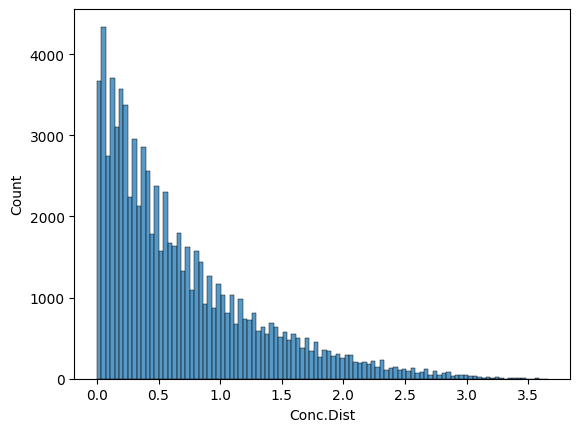

In [94]:
sns.histplot(df["Conc.Dist"])